In [30]:
import pandas as pd

try:
    df = pd.read_csv('Drug_Consumption.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Drug_Consumption.csv' not found. Please ensure the file is in the correct location and accessible.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Age,Gender,Education,Country,Ethnicity,Alcohol,Amphet,Amyl,Benzos,Caff,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,1,Masters degree,UK,White,CL4,CL0,CL0,CL3,CL5,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,1,0,University degree,UK,White,CL6,CL0,CL0,CL0,CL6,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
2,1,1,"Some college or university, no certificate or ...",UK,White,CL5,CL0,CL0,CL5,CL6,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
3,1,0,"Some college or university, no certificate or ...",UK,White,CL5,CL0,CL0,CL0,CL5,...,CL0,CL0,CL0,CL2,CL0,CL0,CL3,CL6,CL0,CL3
4,1,1,Left school at 18 years,UK,White,CL5,CL0,CL3,CL0,CL6,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL4,CL0,CL0


(1884, 24)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        1884 non-null   int64 
 1   Gender     1884 non-null   int64 
 2   Education  1884 non-null   object
 3   Country    1884 non-null   object
 4   Ethnicity  1884 non-null   object
 5   Alcohol    1884 non-null   object
 6   Amphet     1884 non-null   object
 7   Amyl       1884 non-null   object
 8   Benzos     1884 non-null   object
 9   Caff       1884 non-null   object
 10  Cannabis   1884 non-null   object
 11  Choc       1884 non-null   object
 12  Coke       1884 non-null   object
 13  Crack      1884 non-null   object
 14  Ecstasy    1884 non-null   object
 15  Heroin     1884 non-null   object
 16  Ketamine   1884 non-null   object
 17  Legalh     1884 non-null   object
 18  LSD        1884 non-null   object
 19  Meth       1884 non-null   object
 20  Mushrooms  1884 non-null   obj

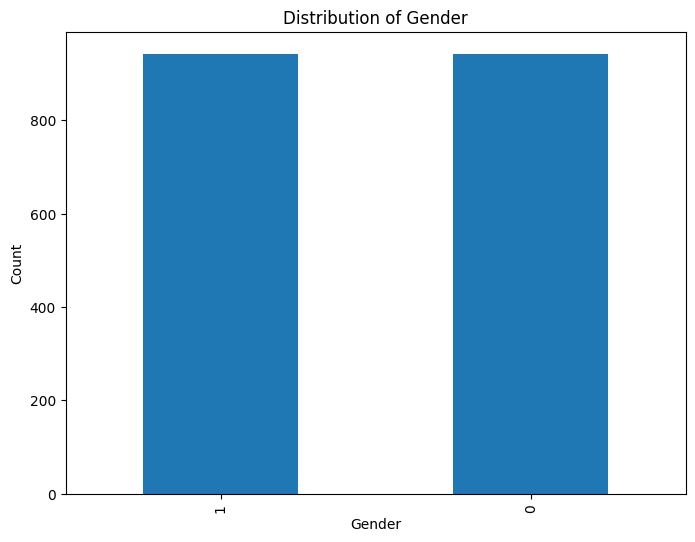


Value counts for Education:
Education
Some college or university, no certificate or degree    506
University degree                                       480
Masters degree                                          283
Professional certificate/ diploma                       269
Left school at 18 years                                 100
Left school at 16 years                                  99
Doctorate degree                                         89
Left school at 17 years                                  30
Left school before 16 years                              28
Name: count, dtype: int64


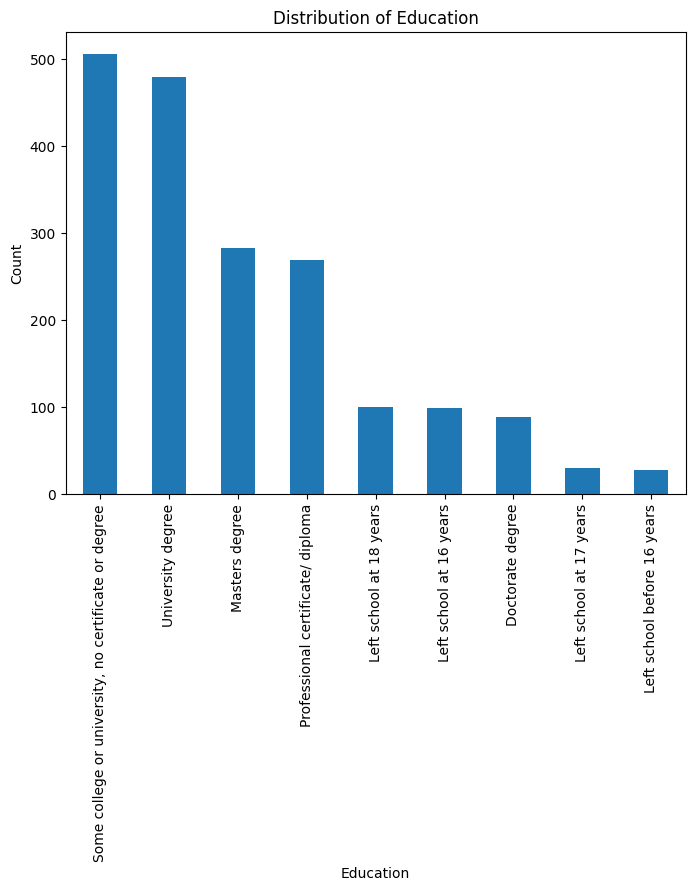


Value counts for Country:
Country
UK                     1043
USA                     557
Other                   118
Canada                   87
Australia                54
Republic of Ireland      20
New Zealand               5
Name: count, dtype: int64


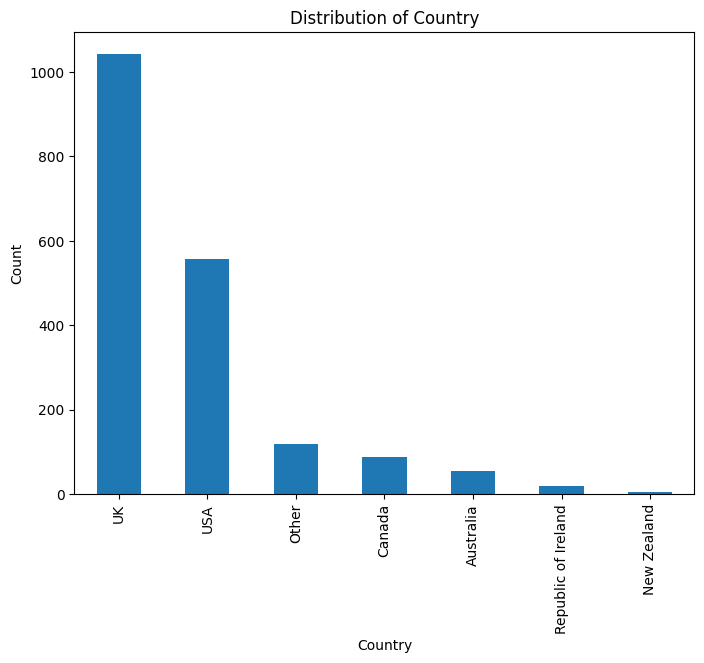


Value counts for Ethnicity:
Ethnicity
White                1720
Other                  63
Black                  33
Asian                  26
Mixed-White/Black      20
Mixed-White/Asian      19
Mixed-Black/Asian       3
Name: count, dtype: int64


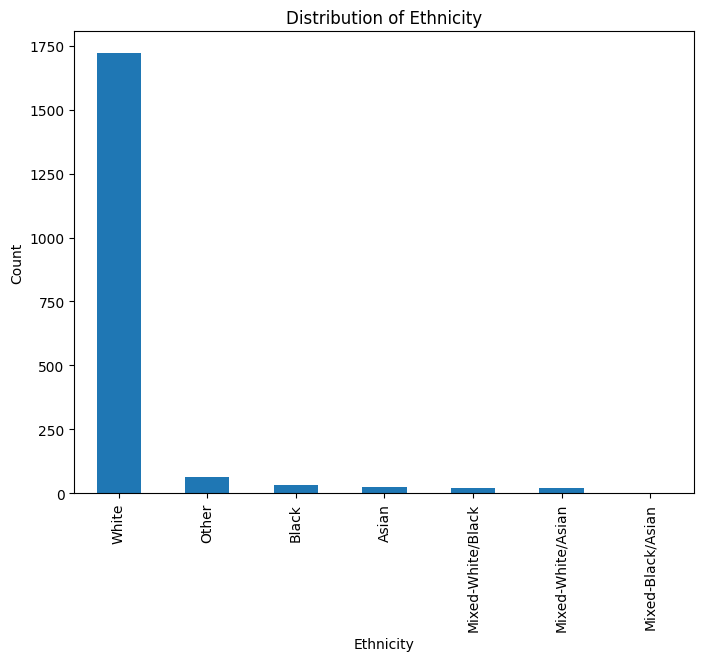

ValueError: could not convert string to float: 'CL4'

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types and inconsistencies
print(df.info())

# 2. Descriptive statistics of numerical features
print(df.describe())

# 3. Distribution of categorical features
categorical_cols = ['Gender', 'Education', 'Country', 'Ethnicity']
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# 4. Correlation between features related to drug usage
drug_usage_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
correlation_matrix = df[drug_usage_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Drug Usage')
plt.show()

# 5. Determine the target variable
# Create a composite variable representing overall drug use
df['overall_drug_use'] = df[drug_usage_cols].apply(lambda row: sum([int(x[2:]) for x in row]), axis=1)
print(f"\nValue counts for overall_drug_use:\n{df['overall_drug_use'].value_counts()}")
plt.figure(figsize=(8, 6))
df['overall_drug_use'].value_counts().plot(kind='bar')
plt.title('Distribution of Overall Drug Use')
plt.xlabel('Overall Drug Use')
plt.ylabel('Count')
plt.show()

# Target variable rationale:
# The 'overall_drug_use' score is derived by summing the usage levels of various drugs.  Higher scores indicate higher overall drug consumption. This provides a single metric to predict the likelihood of future drug abuse.

# 6. Document findings:
# The dataset contains various demographic and drug usage features. 'overall_drug_use' is selected as the target variable, reflecting the overall level of drug consumption.
# Potential issues include the coding scheme for drug usage and potential biases in the data collection process. Further investigation into the meaning of each code is necessary.

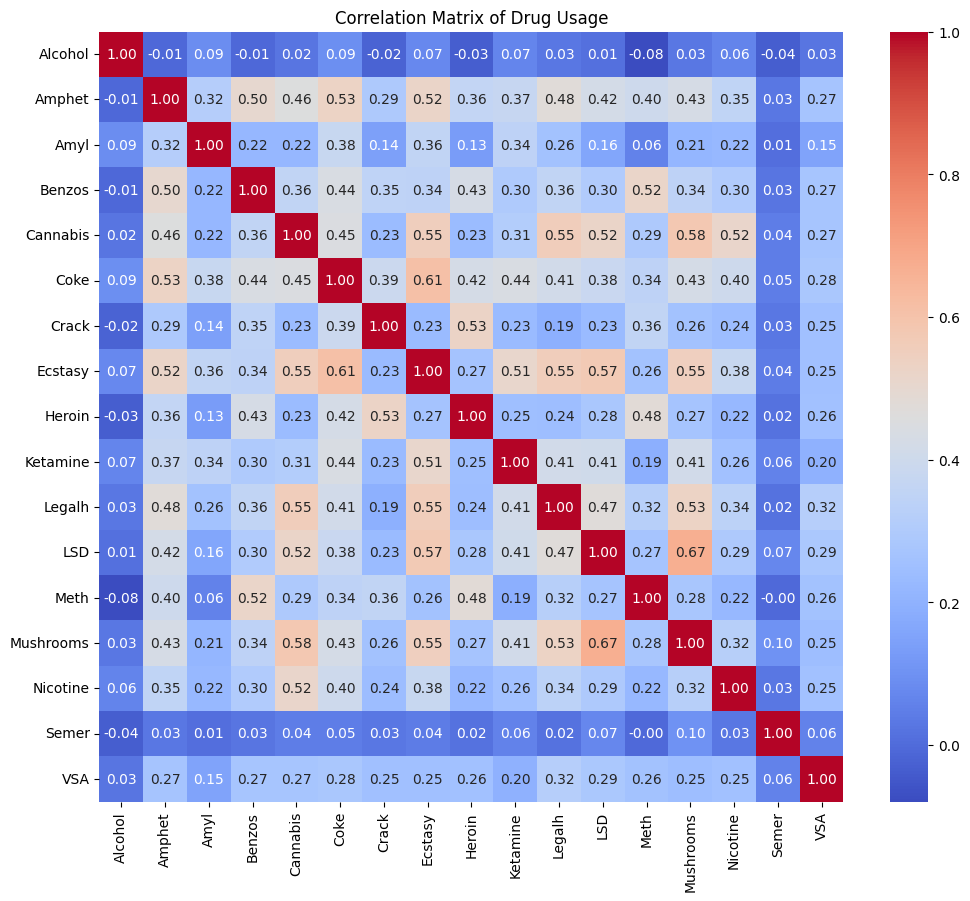


Value counts for overall_drug_use:
overall_drug_use
6     94
5     91
7     86
10    64
8     61
      ..
60     2
57     2
69     1
66     1
68     1
Name: count, Length: 67, dtype: int64


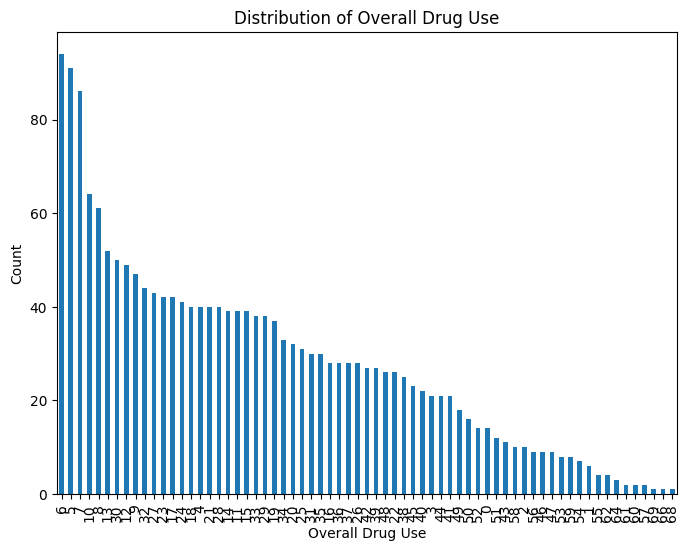

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert drug usage columns to numerical values
drug_usage_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
for col in drug_usage_cols:
    df[col] = df[col].str[2:].astype(int)

# Recalculate the correlation matrix
correlation_matrix = df[drug_usage_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Drug Usage')
plt.show()

# Recalculate overall_drug_use
df['overall_drug_use'] = df[drug_usage_cols].sum(axis=1)
print(f"\nValue counts for overall_drug_use:\n{df['overall_drug_use'].value_counts()}")
plt.figure(figsize=(8, 6))
df['overall_drug_use'].value_counts().plot(kind='bar')
plt.title('Distribution of Overall Drug Use')
plt.xlabel('Overall Drug Use')
plt.ylabel('Count')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1884 non-null   int64 
 1   Gender            1884 non-null   int64 
 2   Education         1884 non-null   object
 3   Country           1884 non-null   object
 4   Ethnicity         1884 non-null   object
 5   Alcohol           1884 non-null   int64 
 6   Amphet            1884 non-null   int64 
 7   Amyl              1884 non-null   int64 
 8   Benzos            1884 non-null   int64 
 9   Caff              1884 non-null   object
 10  Cannabis          1884 non-null   int64 
 11  Choc              1884 non-null   object
 12  Coke              1884 non-null   int64 
 13  Crack             1884 non-null   int64 
 14  Ecstasy           1884 non-null   int64 
 15  Heroin            1884 non-null   int64 
 16  Ketamine          1884 non-null   int64 
 17  Legalh        

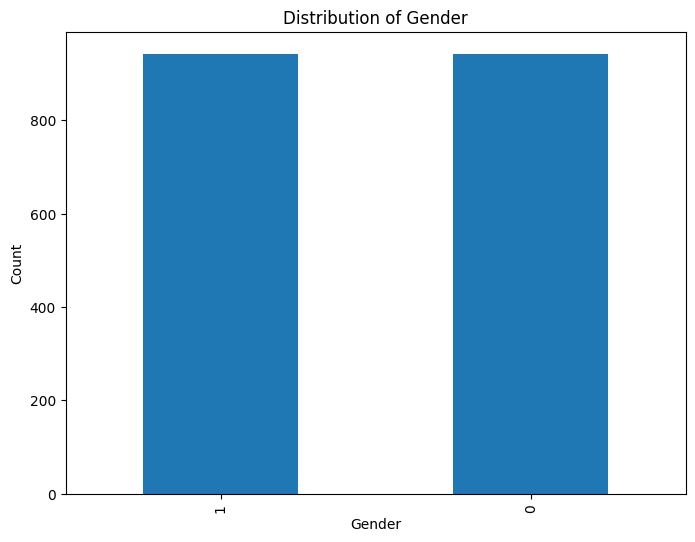


Value counts for Education:
Education
Some college or university, no certificate or degree    506
University degree                                       480
Masters degree                                          283
Professional certificate/ diploma                       269
Left school at 18 years                                 100
Left school at 16 years                                  99
Doctorate degree                                         89
Left school at 17 years                                  30
Left school before 16 years                              28
Name: count, dtype: int64


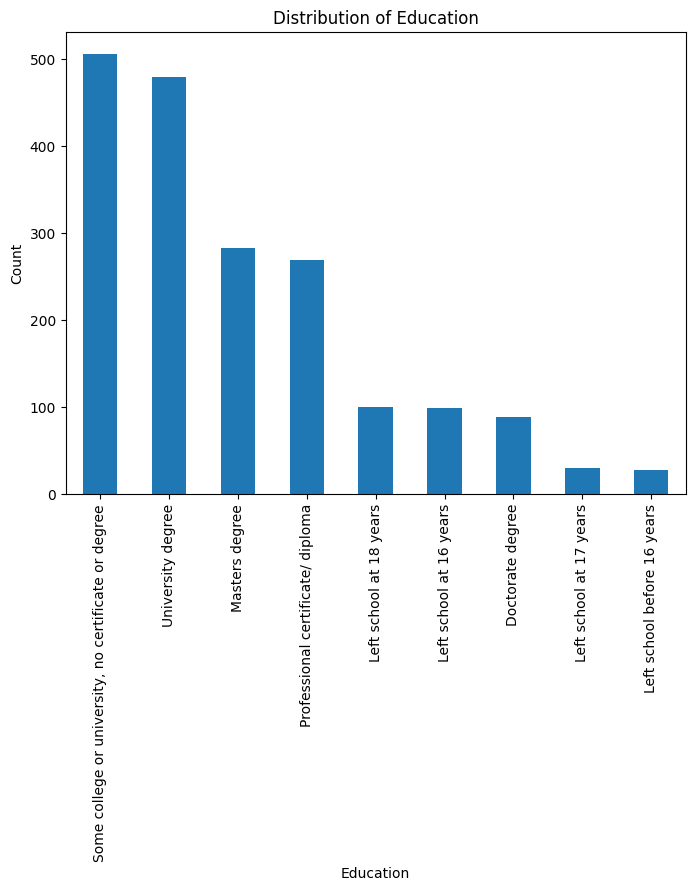


Value counts for Country:
Country
UK                     1043
USA                     557
Other                   118
Canada                   87
Australia                54
Republic of Ireland      20
New Zealand               5
Name: count, dtype: int64


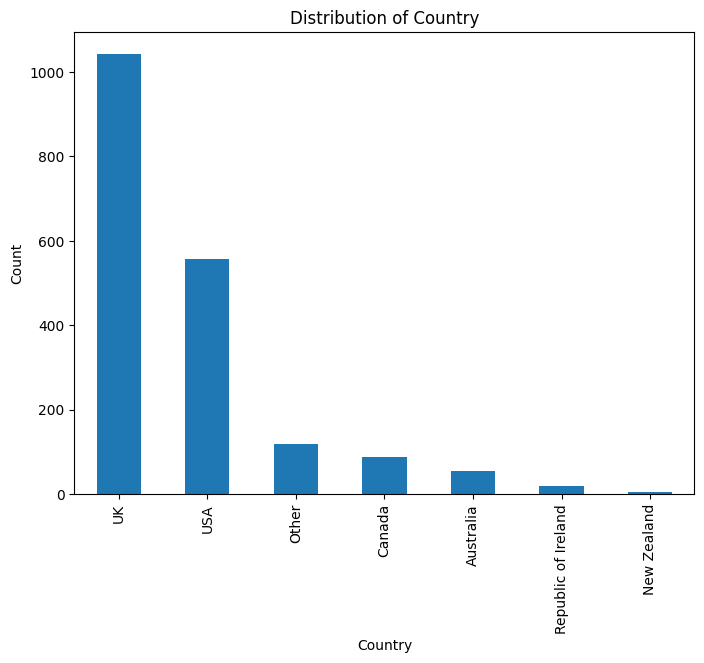


Value counts for Ethnicity:
Ethnicity
White                1720
Other                  63
Black                  33
Asian                  26
Mixed-White/Black      20
Mixed-White/Asian      19
Mixed-Black/Asian       3
Name: count, dtype: int64


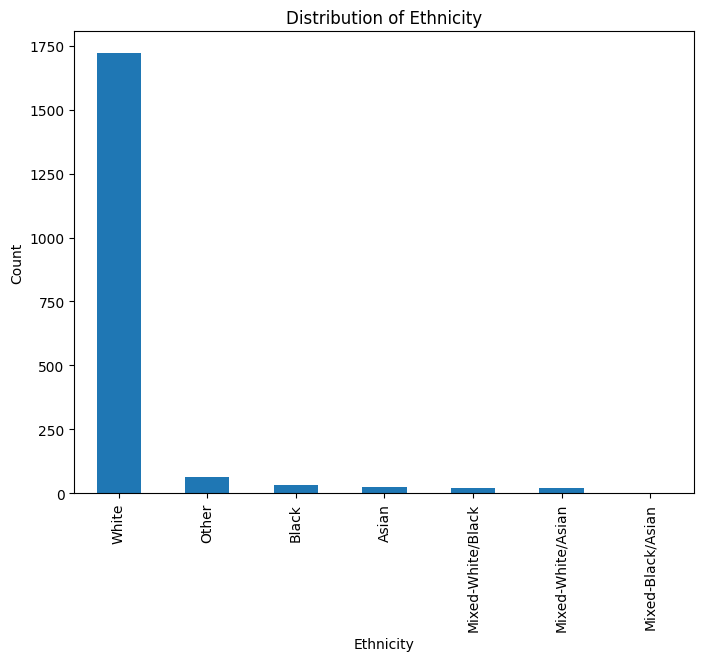

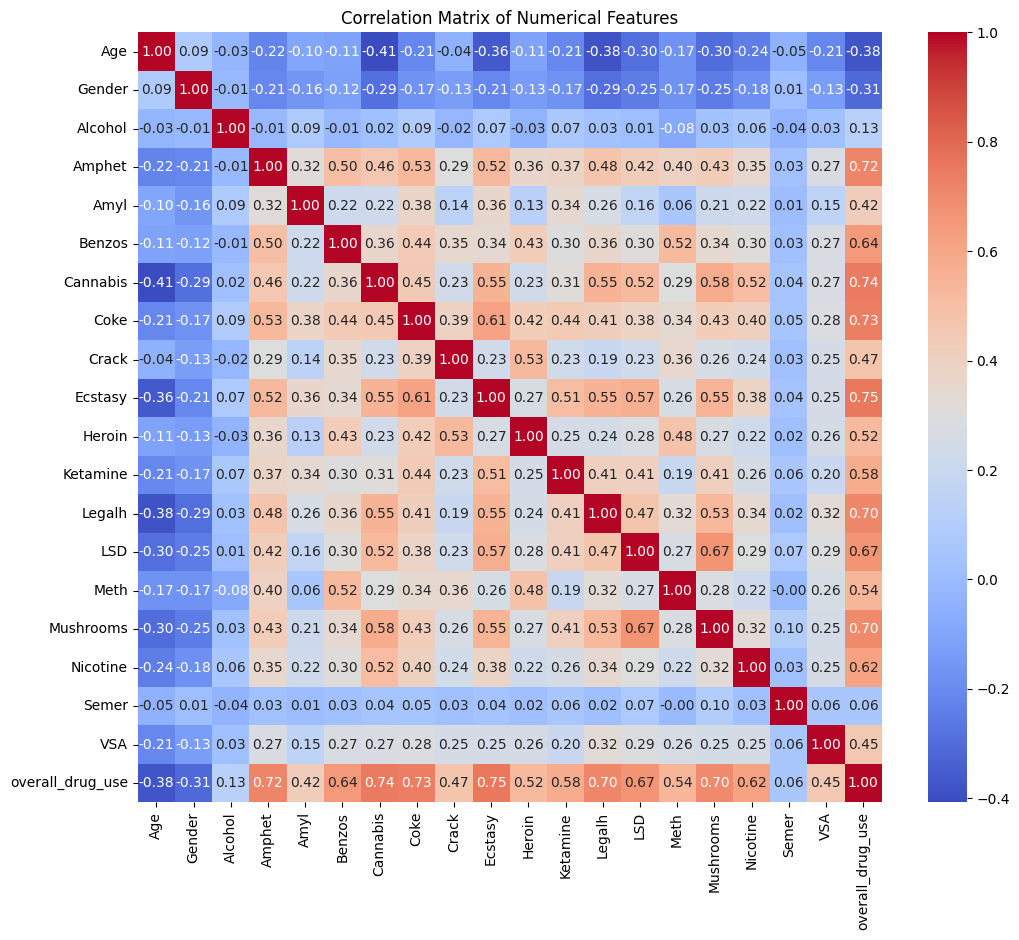


Age range: 1 5


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check data types and missing values
print(df.info())

# Descriptive statistics for numerical columns
print(df.describe())

# Value counts and visualizations for categorical columns
categorical_cols = ['Gender', 'Education', 'Country', 'Ethnicity']  # Add other categorical columns as needed
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Correlation analysis (excluding non-numeric columns)
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Check for inconsistencies (example: unrealistic age values)
print("\nAge range:", df['Age'].min(), df['Age'].max())

In [38]:
# Convert 'Age' to numeric (if not already) and handle potential inconsistencies.
# It seems 'Age' already is numeric, so no conversion is needed.
# Check for unrealistic age values. In the exploration, we found ages from 1 to 5.
# These represent categories, not actual ages. We'll leave them as categorical.

# Convert drug consumption columns to categorical.
drug_columns = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
for col in drug_columns:
    df[col] = pd.Categorical(df[col])

# Convert other categorical columns to categorical data type.
categorical_cols = ['Gender', 'Education', 'Country', 'Ethnicity']
for col in categorical_cols:
    df[col] = pd.Categorical(df[col])

# Double check the data types
print(df.info())

display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1884 non-null   int64   
 1   Gender            1884 non-null   category
 2   Education         1884 non-null   category
 3   Country           1884 non-null   category
 4   Ethnicity         1884 non-null   category
 5   Alcohol           1884 non-null   category
 6   Amphet            1884 non-null   category
 7   Amyl              1884 non-null   category
 8   Benzos            1884 non-null   category
 9   Caff              1884 non-null   category
 10  Cannabis          1884 non-null   category
 11  Choc              1884 non-null   category
 12  Coke              1884 non-null   category
 13  Crack             1884 non-null   category
 14  Ecstasy           1884 non-null   category
 15  Heroin            1884 non-null   category
 16  Ketamine          1884 n

,Age,Gender,Education,Country,Ethnicity,Alcohol,Amphet,Amyl,Benzos,Caff,...,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,overall_drug_use
0,1,1,Masters degree,UK,White,4,0,0,3,CL5,...,0,2,0,0,0,0,2,0,0,15
1,1,0,University degree,UK,White,6,0,0,0,CL6,...,0,0,0,0,0,0,0,0,0,6
2,1,1,"Some college or university, no certificate or ...",UK,White,5,0,0,5,CL6,...,0,0,0,0,0,0,0,0,0,10
3,1,0,"Some college or university, no certificate or ...",UK,White,5,0,0,0,CL5,...,0,0,2,0,0,3,6,0,3,29
4,1,1,Left school at 18 years,UK,White,5,0,3,0,CL6,...,0,0,0,0,0,0,4,0,0,12


In [40]:
import pandas as pd

# Create a copy of the original DataFrame to avoid modifying the original data
df_encoded = df.copy()

# Numerical Encoding of Drug Consumption
# Use Label Encoding for drug consumption columns.  CL0 represents non-use.
# Higher CL values indicate higher consumption levels. This preserves the ordinal relationship.

drug_columns = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
for col in drug_columns:
    df_encoded[col] = df_encoded[col].astype(str).str.replace('CL', '').astype(int)


# Encoding of Categorical Features
# One-hot encode 'Gender', 'Education', 'Country', and 'Ethnicity'
categorical_cols = ['Gender', 'Education', 'Country', 'Ethnicity']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

# Feature Creation
# Total Number of Drugs Used
df_encoded['Total_Drugs_Used'] = df_encoded[drug_columns].sum(axis=1)

# Risk Level Categorization (Example)
# Define thresholds for risk levels based on total drug usage. Adjust these thresholds as needed.
def categorize_risk(total_drugs):
    if total_drugs <= 10:
        return 'low risk'
    elif total_drugs <= 25:
        return 'medium risk'
    else:
        return 'high risk'

df_encoded['Risk_Level'] = df_encoded['Total_Drugs_Used'].apply(categorize_risk)

# Remove any redundant columns (if needed) -  Example, remove the original columns
# df_encoded = df_encoded.drop(columns=categorical_cols)

display(df_encoded.head())

,Age,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,...,Country_UK,Country_USA,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White,Total_Drugs_Used,Risk_Level
0,1,4,0,0,3,5,2,4,2,0,...,True,False,False,False,False,False,False,True,24,medium risk
1,1,6,0,0,0,6,0,6,0,0,...,True,False,False,False,False,False,False,True,18,medium risk
2,1,5,0,0,5,6,0,6,0,0,...,True,False,False,False,False,False,False,True,22,medium risk
3,1,5,0,0,0,5,4,5,3,3,...,True,False,False,False,False,False,False,True,39,high risk
4,1,5,0,3,0,6,0,5,0,0,...,True,False,False,False,False,False,False,True,23,medium risk


In [42]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('Risk_Level', axis=1)
y = df_encoded['Risk_Level']

# Initial split into temporary training and combined validation/testing sets
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Split the combined validation/testing set into separate validation and testing sets
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Display the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (753, 43)
X_val shape: (754, 43)
X_test shape: (377, 43)
y_train shape: (753,)
y_val shape: (754,)
y_test shape: (377,)


In [44]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

# 1. Polynomial Features
numerical_cols = ['Age', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA', 'Total_Drugs_Used']
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train[numerical_cols])
X_val_poly = poly.transform(X_val[numerical_cols])

# 2. Interaction Features (Example)
# Create interaction between 'Age' and 'Total_Drugs_Used'
X_train_poly = np.column_stack((X_train_poly, X_train['Age'] * X_train['Total_Drugs_Used']))
X_val_poly = np.column_stack((X_val_poly, X_val['Age'] * X_val['Total_Drugs_Used']))


# 3. Scaling
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_val_poly = scaler.transform(X_val_poly)

# 4. Dimensionality Reduction (Optional -  uncomment if needed)
# pca = PCA(n_components=0.95)  # Keep 95% of variance
# X_train_poly = pca.fit_transform(X_train_poly)
# X_val_poly = pca.transform(X_val_poly)

print("X_train_poly shape:", X_train_poly.shape)
print("X_val_poly shape:", X_val_poly.shape)

X_train_poly shape: (753, 253)
X_val_poly shape: (754, 253)


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train_poly, y_train)

# Make predictions on the validation set
y_pred = rf_classifier.predict(X_val_poly)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9986737400530504
Precision: 0.9986785279950972
Recall: 0.9986737400530504
F1-score: 0.9986400376255414
Confusion Matrix:
[[468   0   0]
 [  0   9   1]
 [  0   0 276]]


In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create the RandomizedSearchCV object
f1_scorer = make_scorer(f1_score, average='weighted')
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid,
    n_iter=10,
    scoring=f1_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the random search to the training data
random_search.fit(X_train_poly, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model on the validation set
best_rf_classifier = random_search.best_estimator_
y_pred_best = best_rf_classifier.predict(X_val_poly)

accuracy_best = accuracy_score(y_val, y_pred_best)
precision_best = precision_score(y_val, y_pred_best, average='weighted')
recall_best = recall_score(y_val, y_pred_best, average='weighted')
f1_best = f1_score(y_val, y_pred_best, average='weighted')
conf_matrix_best = confusion_matrix(y_val, y_pred_best)

print(f"Best Model Accuracy: {accuracy_best}")
print(f"Best Model Precision: {precision_best}")
print(f"Best Model Recall: {recall_best}")
print(f"Best Model F1-score: {f1_best}")
print(f"Best Model Confusion Matrix:\n{conf_matrix_best}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/anupgautam/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anupgautam/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anupgautam/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anupgautam/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/Users/anupgautam/minicon

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
Best Model Accuracy: 0.9840848806366048
Best Model Precision: 0.9843641878540541
Best Model Recall: 0.9840848806366048
Best Model F1-score: 0.9792937536863161
Best Model Confusion Matrix:
[[468   0   0]
 [  0   1   9]
 [  3   0 273]]


In [50]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Transform the test data using the same transformers fitted on the training data
X_test_poly = poly.transform(X_test[numerical_cols])
X_test_poly = np.column_stack((X_test_poly, X_test['Age'] * X_test['Total_Drugs_Used']))
X_test_poly = scaler.transform(X_test_poly)

# Predict on the test set
y_pred_test = best_rf_classifier.predict(X_test_poly)

# Evaluate the best model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print(f"Test Set Accuracy: {accuracy_test}")
print(f"Test Set Precision: {precision_test}")
print(f"Test Set Recall: {recall_test}")
print(f"Test Set F1-score: {f1_test}")
print(f"Test Set Confusion Matrix:\n{conf_matrix_test}")

Test Set Accuracy: 0.9893899204244032
Test Set Precision: 0.9896887959054059
Test Set Recall: 0.9893899204244032
Test Set F1-score: 0.9859290135152204
Test Set Confusion Matrix:
[[234   0   0]
 [  0   1   4]
 [  0   0 138]]
